# Linear regression with Python and Numpy (with fancy GIF visualisation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

In [2]:
x = np.linspace(-10, 10, 1000)
y = 2 * x - 1
y_n = y + 5 * np.random.randn(y.shape[0])

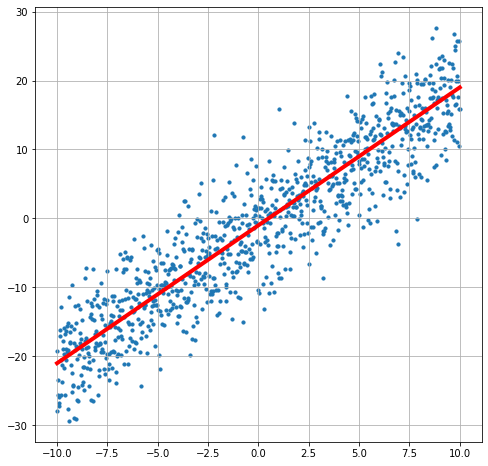

In [3]:
plt.figure(figsize=(8, 8))
plt.plot(x, y, color='red', linewidth=4)
plt.scatter(x, y_n, color='C0', s=10)
plt.grid()
plt.show()

In [4]:
a, b = np.random.randn(), np.random.randn()
print(f'a = {a}, b = {b}')

a = 0.2663563898182079, b = 0.32229060697988665


In [5]:
def get_plot_as_image(x, y, y_pred, epoch):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(x, y, color='C0', s=10, label='y')
    ax.plot(x, y_pred, color='red', linewidth=4, label='y_pred')
    ax.grid()
    ax.legend(loc='upper right')
    ax.set(xlabel='x', ylabel='y', title=f'Epoch: {epoch}')
    ax.set_ylim(-25, 25)
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()
    return image

In [6]:
m = x.shape[0]
alpha = 0.000005
plots = []
losses = []

for i in range(50):
    y_pred = a * x + b
    error = y_pred - y_n
    loss = 0.5 * np.mean(error ** 2)

    # Gradients
    a_grad = np.mean(error @ x)
    b_grad = np.mean(error)
    
    # Update
    a -= alpha * a_grad
    b -= alpha * b_grad
    
    # Log plots and loss
    plots.append(get_plot_as_image(x, y_n, y_pred, i))
    losses.append(loss)

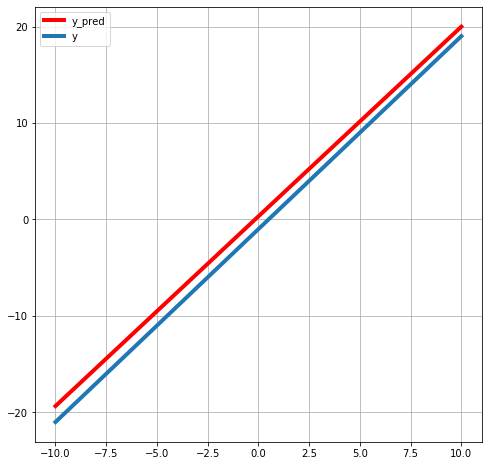

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(x, a * x + b, color='red', linewidth=4, label='y_pred')
plt.plot(x, y, color='C0', linewidth=4, label='y')
plt.grid()
plt.legend()
plt.show()

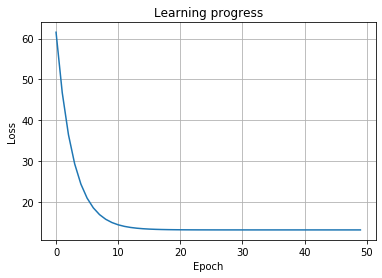

In [8]:
plt.figure()
plt.plot(losses)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning progress')
plt.show()

In [9]:
imageio.mimsave('progress.gif', plots, fps=10)

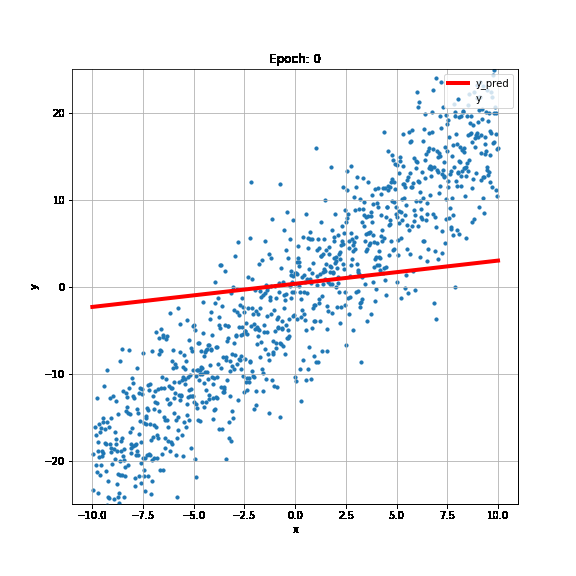

In [10]:
Image(filename="progress.gif")